In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("raw_data.csv")

In [ ]:
df = data.copy()

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

Basic insights from data:

1. Data do not contain any missing value.
2. Data do not contain any duplicate rows.
3. Data contains a unnecessary feature that is RowNumber.
4. Data contains few feaures that has not any significance on Prediction model that are CustomerName, Surname.
5. In our data, Gender and Geography are of object datatype that must be changed for further modelling.

In [ ]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8652,8653,15787204,Howe,774,Spain,Female,43,1,110646.54,1,0,0,108804.28,0
483,484,15578186,Pirozzi,486,Germany,Male,37,9,115217.99,2,1,0,144995.33,0
9290,9291,15634591,Saunders,850,France,Male,33,8,73059.38,1,1,1,186281.00,0
4150,4151,15566295,Sanders,761,France,Female,33,6,138053.79,2,1,0,148779.41,0
4725,4726,15734987,Robertson,658,France,Female,43,7,140260.36,2,1,0,2748.72,0


**Exploratory Data Analysis**

<Figure size 600x600 with 0 Axes>

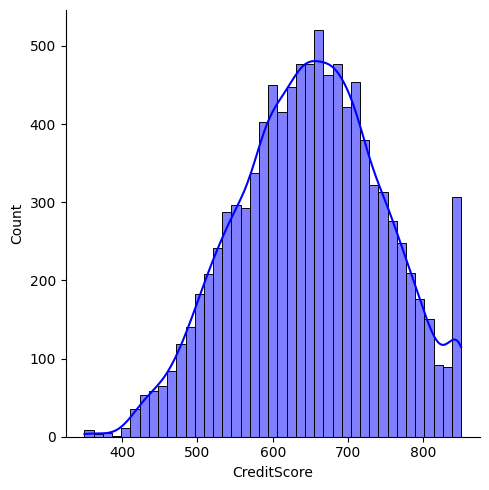

In [ ]:
## CreditScore
plt.figure(figsize = (6,6))
sns.displot(data = df,x = "CreditScore",color = "blue",kde = True)

1. It is clearly observable that mostly have their credit scores betwen 600 to 700.
2. Distribution is right-skewed.
3. There is a spike that is visible around 800.
4. It also shows the presence of outliers.
5. Almost all have the credirscores more than 400 due to some unaware or lack of knowledge about this.

<Axes: xlabel='CreditScore'>

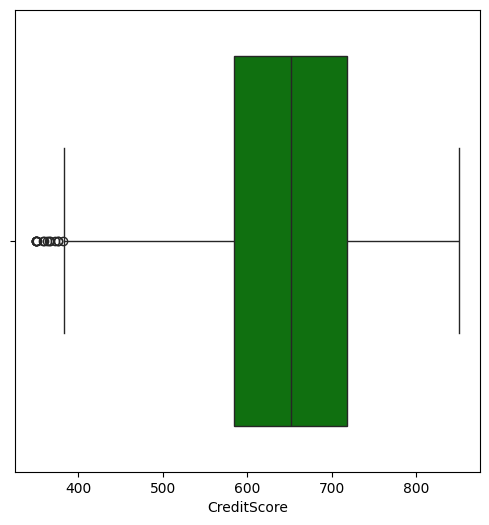

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(data = df,x = "CreditScore",color = "green")

In [ ]:
"""From above plot, it is clearly visible that the outliers are present below the minimum value of 5-number summary.
And the median lies around 650"""

'From above plot, it is clearly visible that the outliers are present below the minimum value of 5-number summary.\nAnd the median lies around 650'

<Axes: xlabel='CreditScore', ylabel='Exited'>

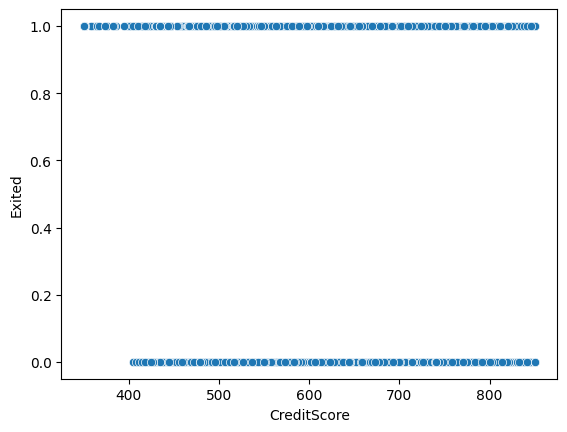

In [ ]:
## CreditScore Vs Exited
sns.scatterplot(data = df,x = "CreditScore",y = "Exited",palette = ["green","red"])

1. It is clearly visible that customers haing creditscore less than 400 , all have exited or churned.

<Axes: ylabel='count'>

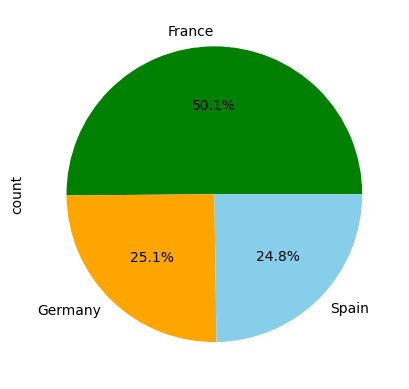

In [ ]:
## Geography
df["Geography"].value_counts().plot.pie(autopct = "%1.1f%%",colors = ["green","orange","skyblue"])

1. Customers belongs from three geographic locations France, Germany, Spain.
2. Half of the customers belong from France.

<Axes: xlabel='Geography', ylabel='count'>

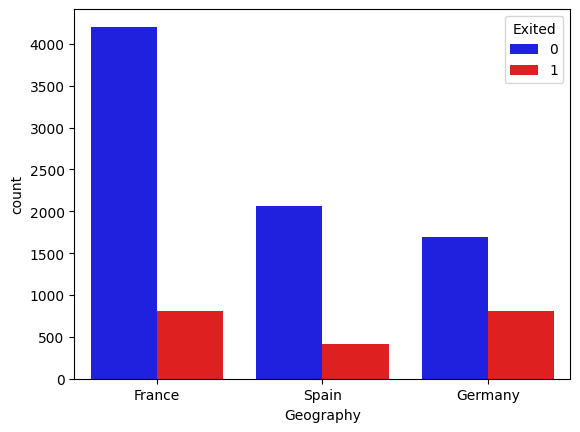

In [ ]:
## Geography Vs Exited
sns.countplot(data = df,x = "Geography",hue = "Exited",palette = ["blue","red"])

1. In all of the geographic locations the exiting rate is low.
2. But among all three,the churning rate is higher in Germany.

<Axes: ylabel='count'>

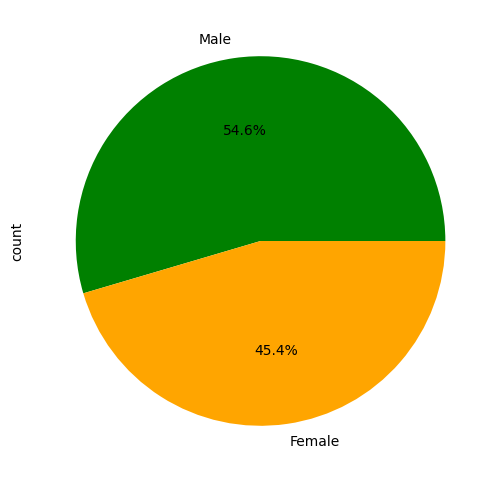

In [ ]:
plt.figure(figsize = (6,6))
df["Gender"].value_counts().plot.pie(autopct = "%1.1f%%",colors = ["green","orange","skyblue"])

1. Mostly customers are male.

<Axes: xlabel='Geography', ylabel='count'>

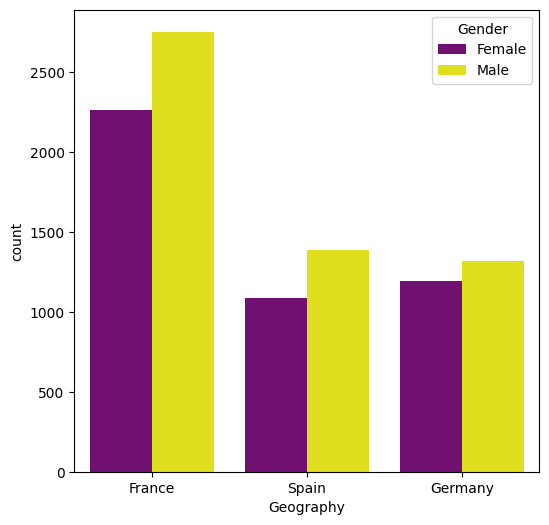

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(data = df,x = "Geography",hue = "Gender",palette=["purple","yellow"])

Customers from all three geographic locations are male dominated but with a very slight difference between count of male and female.

<Axes: xlabel='Gender', ylabel='count'>

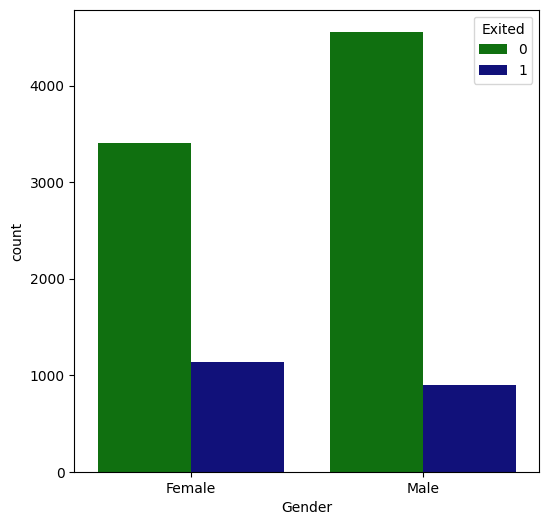

In [ ]:
## Gender Vs Exited
plt.figure(figsize=(6,6))
sns.countplot(data =df,x = "Gender",hue = "Exited",palette = ["green","darkblue"])

1. Most of the customers are male and among male there is very less proportion of exited male customers.
2. Exiting rate is seem to be higher in female than male.

<Figure size 600x600 with 0 Axes>

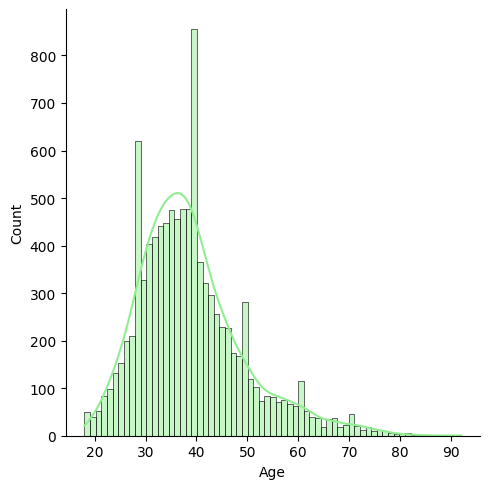

In [ ]:
## Age
plt.figure(figsize = (6,6))
sns.displot(data=df,x = "Age",kde = True,color="lightgreen" )

1. Very less customers have age  beyond 80.
2. There is very high spike at 40, which simply means that mostly customers are of age 40.
3. It is clearly visible that all the customers are of 18 or above 18.
4. Maximum customers are having their age group between 30 - 40.

<Axes: xlabel='Age'>

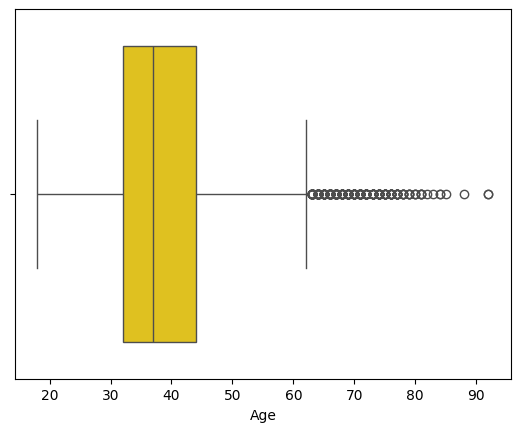

In [ ]:
sns.boxplot(data = df,x = "Age",color = "gold")

1. Age's distribution tell us that the median age is about 36 or 37.
2. Minimum age and maximum age is 18 and about 63.
3. There are outliers or noises present above maximum age.

<Axes: xlabel='Exited', ylabel='Age'>

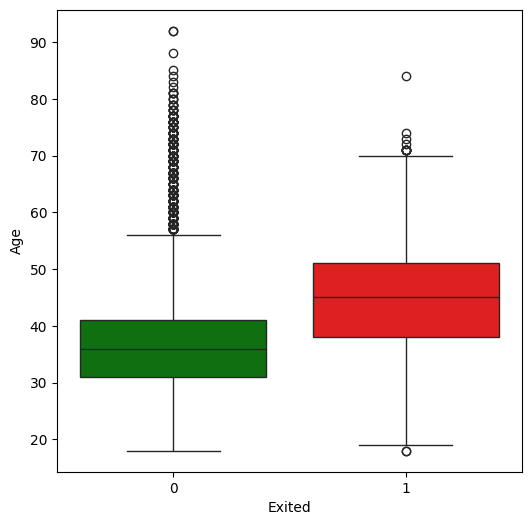

In [ ]:
## Age Vs Exited
plt.figure(figsize = (6,6))
sns.boxplot(data = df,x ="Exited",y= "Age",palette= ["green","red"])

1. It is clearly observable the customers above age 60 have exited.
2. After seeing median of both distribution, it is visible that non exited customers have median age about 35 whereas exited customers have median age of about 45.
3. Customers with experience have high leaving rate than customers with less experience or new.

<Figure size 600x600 with 0 Axes>

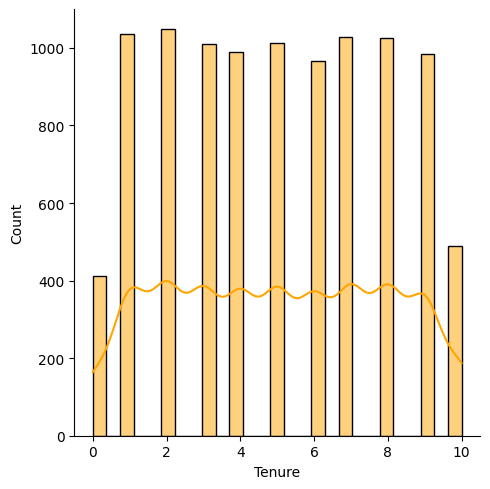

In [ ]:
## Tenure
plt.figure(figsize = (6,6))
sns.displot(data = df,x ="Tenure",color = "Orange",kde =True)

1. Mostly customers have the tenure between 1 and 9.
2. Few customers have the tenure of 0 years and 10 years.


<Axes: xlabel='Tenure'>

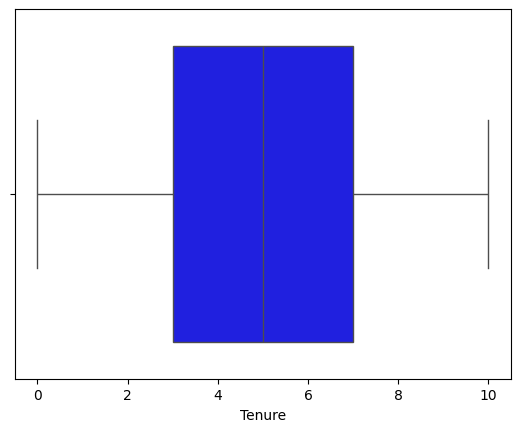

In [ ]:
sns.boxplot(data = df,x="Tenure",color = "blue")

1. Mostly customers have the tenure of 5 years.
2. Maximum and minimun tenure is 0 and 10.

<Axes: xlabel='Exited', ylabel='Tenure'>

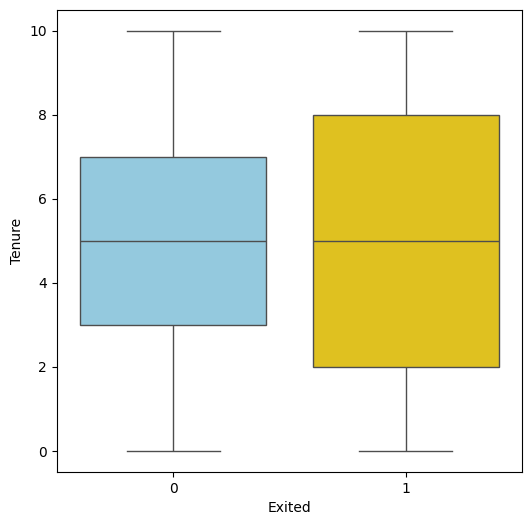

In [ ]:
## Tenure Vs Exited
plt.figure(figsize =(6,6))
sns.boxplot(data = df,x= "Exited",y = "Tenure",palette = ["skyblue","gold"])

1. Exited customers and non exited customers have the same median tenure about 5 years.
2. Exited customers has the greater difference between 75th percentile and 25th percentile as compared to non exited customers distribution.

<Figure size 600x600 with 0 Axes>

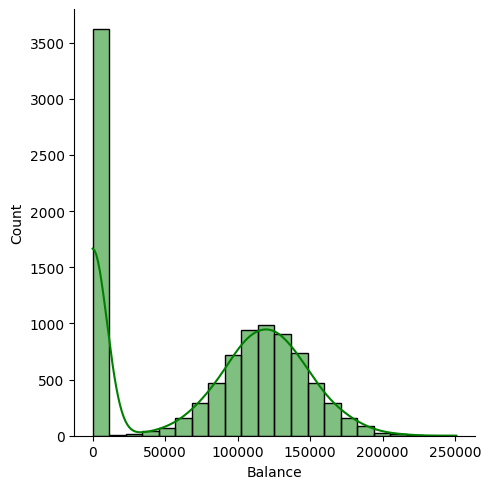

In [ ]:
## Balance
plt.figure(figsize = (6,6))
sns.displot(data =df,x = "Balance",kde = True,color = "green")

1. More than half of customers have the balance 0.
2. Data is approximately normally distributed where the mean seems to be 130000.

<Axes: xlabel='Balance'>

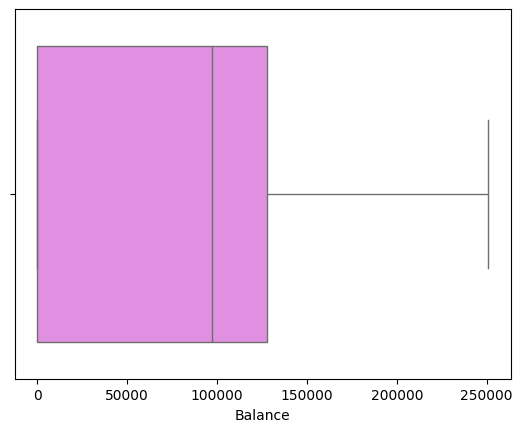

In [ ]:
sns.boxplot(data = df,x = "Balance",color = "violet")

1. Balance distribution do not contain any outliers.
2. Median is about 100000.
3. Minimum and maximum balance is 0 and 250000.

<Axes: xlabel='Exited', ylabel='Balance'>

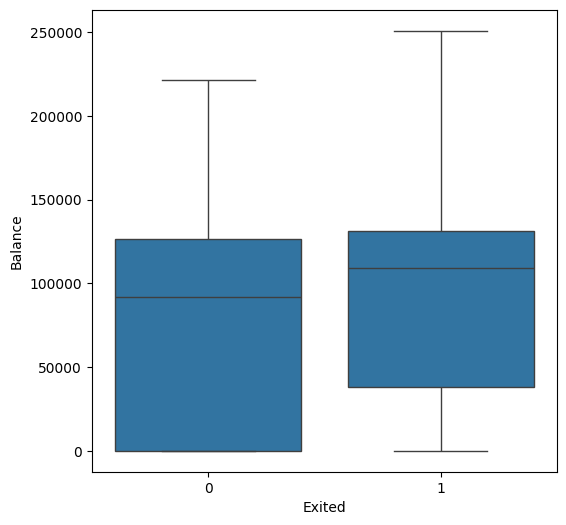

In [ ]:
## Exited Vs Balance
plt.figure(figsize = (6,6))
sns.boxplot(data=df,x= "Exited",y = "Balance")

1. Median of non- exited customers is about 98000 whereas median of exited customers is about 110000.
2. There is large difference between 50th and 25th percentile for both exited and non-exited customers.
3. Exited customers have the highest balance as compare to non exited customers.

<Axes: ylabel='count'>

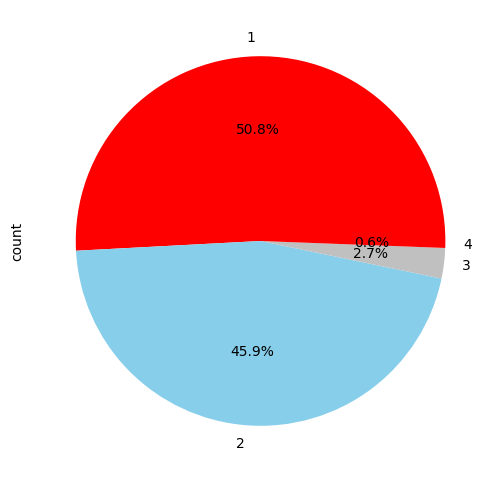

In [ ]:
## NumOfProducts
plt.figure(figsize=(6,6))
df["NumOfProducts"].value_counts().plot.pie(autopct = "%1.1f%%",colors = ["red","skyblue","silver"])

1. Customers with 1 and 2 products are dominating.
2. Customers with 3 and 4 are in very low percentage and customers with 4 products are almost negligible(0.6).

<Axes: xlabel='NumOfProducts', ylabel='count'>

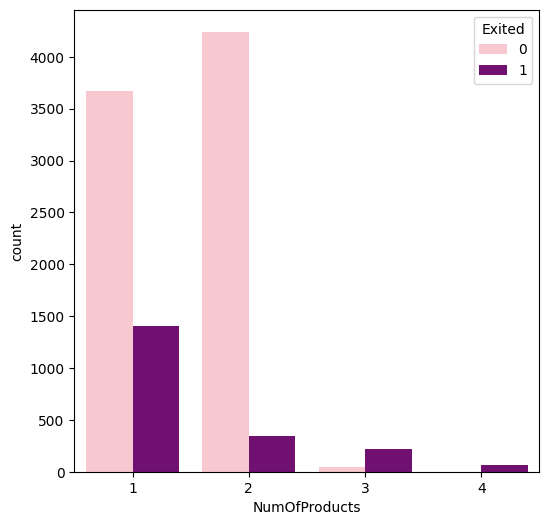

In [ ]:
## Exited Vs NumOfProducts
plt.figure(figsize = (6,6))
sns.countplot(data = df,x = "NumOfProducts",hue = "Exited",palette=["pink","purple"])

1. Customers with 2 products are very satisfied as their exiting rate is very low.
2. Customers with 4 products are almost all exited.
3. Customers with 3 products have exiting rate as exited customers are in more count as compared to non- exited customers.

<Axes: ylabel='count'>

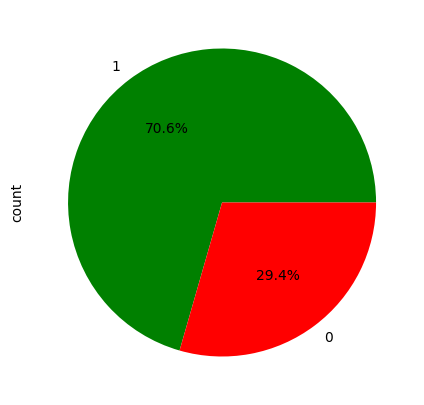

In [ ]:
## HasCrCard
plt.figure(figsize = (5,5))
df["HasCrCard"].value_counts().plot.pie(autopct = "%1.1f%%",colors = ["green","red"])

1. It is clearly observable that customers having credit card are about 70% of the total customers.


<Axes: xlabel='HasCrCard', ylabel='count'>

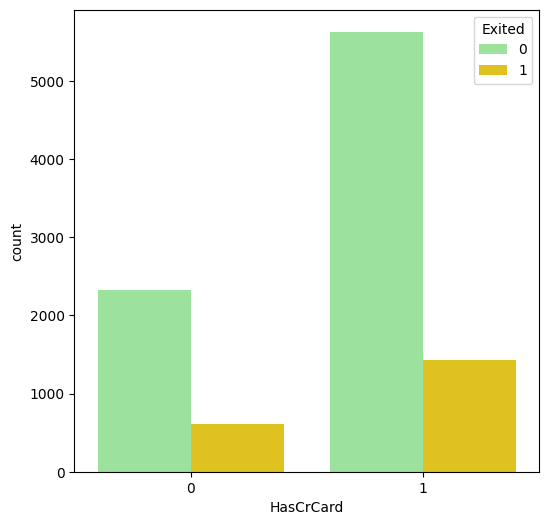

In [ ]:
## HasCrCard Vs Exited
plt.figure(figsize = (6,6))
sns.countplot(data = df,x = "HasCrCard",hue = "Exited",palette = ["Lightgreen","gold"])

Customers with credit card or without credit card, both have high staying rate as compared to their exiting rate.

<Axes: xlabel='IsActiveMember', ylabel='count'>

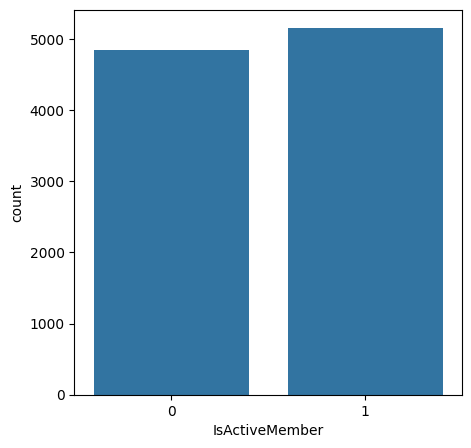

In [ ]:
## IsActiveMember
plt.figure(figsize = (5,5))
sns.countplot(data = df,x = "IsActiveMember")

Customers as active members and past members have very low difference in count about 300 or 400

<Axes: xlabel='IsActiveMember', ylabel='count'>

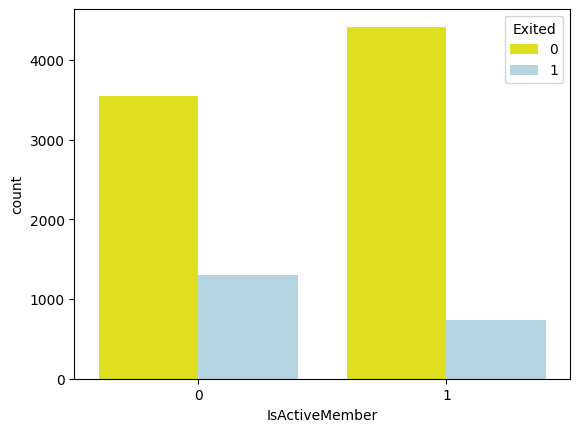

In [ ]:
## IsActiveMember Vs Exited
sns.countplot(data = df,x ="IsActiveMember",hue ="Exited",palette = ["yellow","lightblue"])

Past customers have the high churning rate as compared to churning rate of active customers.
This can be due to improvement in services.

<Figure size 600x600 with 0 Axes>

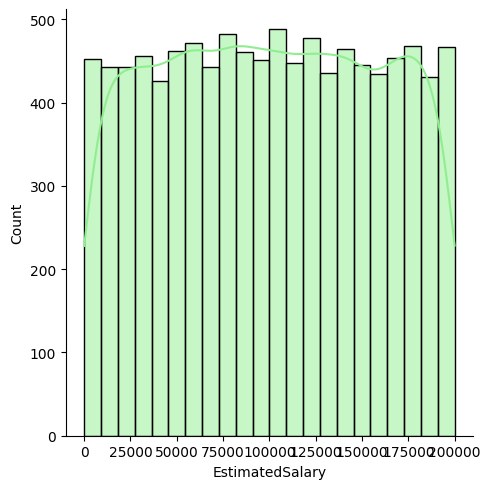

In [ ]:
## EstimatedSalary
plt.figure(figsize = (6,6))
sns.displot(data =df,x = "EstimatedSalary",kde= True,color="lightgreen")

1. EstimatedSalary follows uniform distribution as each bar are of similar or equal height.
2. There is no skewness in this distribution.
3. This feature contain very unusual information because in real world salaries are not so well distributed, infact it is rightly skewed.
4. Dropping this feature cannot have any impact on customers churned or not.

<Axes: >

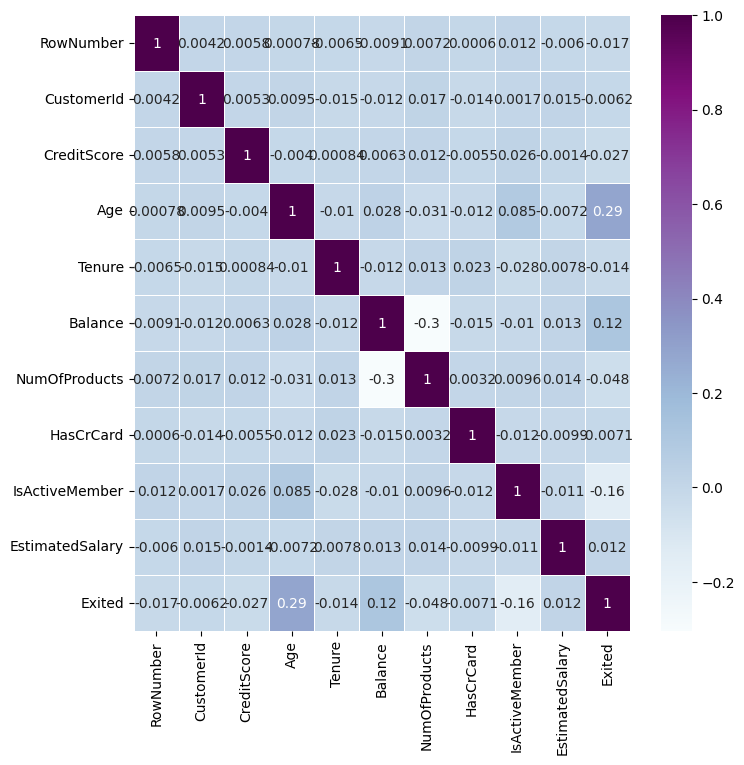

In [ ]:
## Correlation
corr = df.select_dtypes(include = ["number"]).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap = "BuPu",linewidths=0.5)

1. Older customers are more likely to leave.
2. Active members tend to stay longer.
3. Customers with more products tend to have lower balances.
4. Tenure and salary do not significantly impact customer churn.

**Insights from EDA**<br>
1. CreditScore, Age contains outliers or noise.
2. EstimatedSalary contain unusual or unrealistic information.
3. There is no feature that can show direct relation with dependent feature.

*Handling Outliers*